# Análise Exploratória dos Dados

## Dataset Avaliações de Vinhos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 1.Número de registros e colunas

In [9]:
# data source: https://www.kaggle.com/datasets/zynicide/wine-reviews

df = pd.read_csv("./WineReview/winemag-data-130k-v2.csv")
df.shape

(129971, 14)

### 2. Cinco primeiros registros

In [10]:
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### 3.Colunas base de dados

In [11]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

### 4.Informações

In [13]:
# informações sobre os nomes das colunas do dataframe, índice dtype e valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


### 5.Colunas com valores nulos

In [16]:
df.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

### 6.Quantidade de vinhos avaliados por país

In [17]:
df["country"].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

### 7.Limpeza dos Dados

In [18]:
# Fazendo uma cópia do DataFrame:
df1 = df.copy()

In [19]:
# Removendo colunas não necessárias
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [20]:
# Removendo linhas com dados nulos do DataFrame filtrando por país, preço e variedade de uvas para Análise dos Dados
df1 = df1.dropna(subset=["country", "price", "variety"])

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


### 8.Top 10 países que mais produzem vinhos

In [21]:
country_top_10 = df1["country"].value_counts()[:10]
country_top_10

US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: country, dtype: int64

### 9.Países que mais tiveram vinhos avaliados

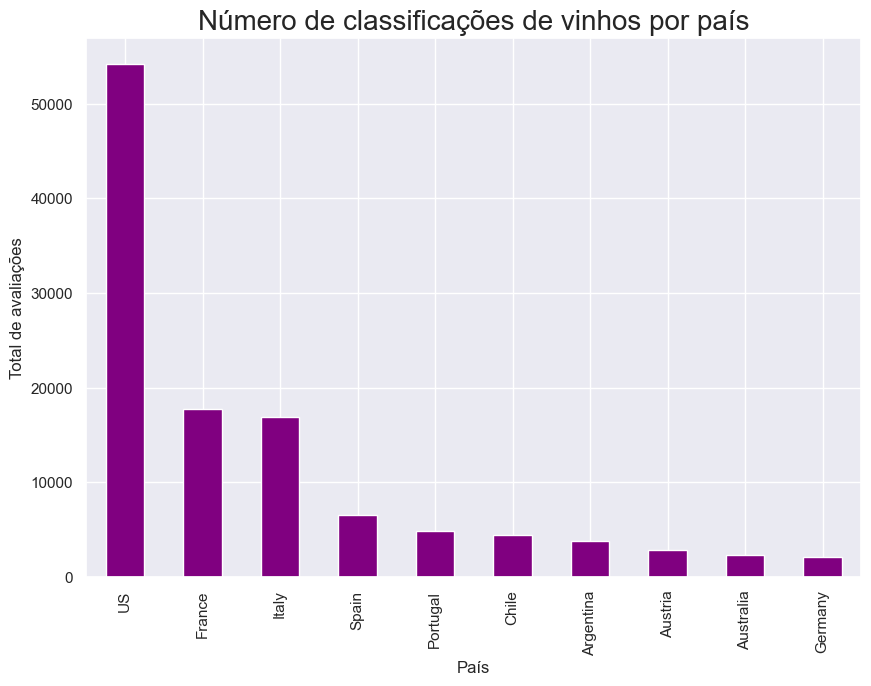

In [23]:
plt.figure(figsize=(10, 7))
country_top_10.plot(kind='bar', color = 'purple')
plt.title('Número de classificações de vinhos por país', fontsize = 20)
plt.xlabel('País')
plt.ylabel('Total de avaliações');

### 10.Países produtores do vinho de melhor qualidade de acordo com as classificações

C:\Users\Eduarda\AppData\Local\Temp\ipykernel_16048\1839635029.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melhor_qualidade = df1.groupby("country").agg("mean")


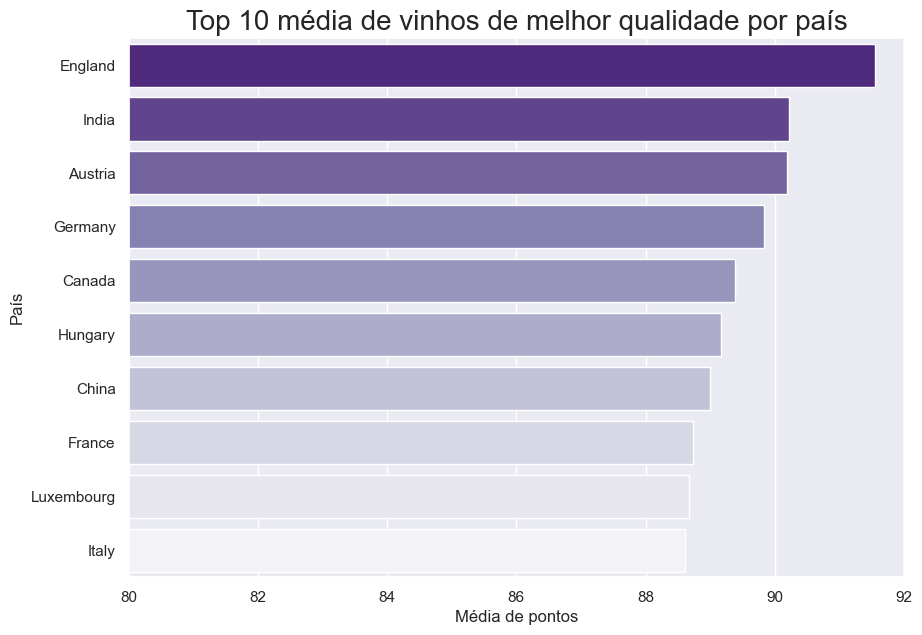

In [34]:
melhor_qualidade = df1.groupby("country").agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(by="points", ascending=False)[:10]
y = melhor_qualidade.index.to_series()
x = melhor_qualidade["points"]

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Top 10 média de vinhos de melhor qualidade por país', fontsize = 20)
plt.xlabel('Média de pontos')
plt.ylabel('País');

### 11.Preço do vinho nos países

C:\Users\Eduarda\AppData\Local\Temp\ipykernel_16048\287193036.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_price = df1.groupby("country").agg("mean")


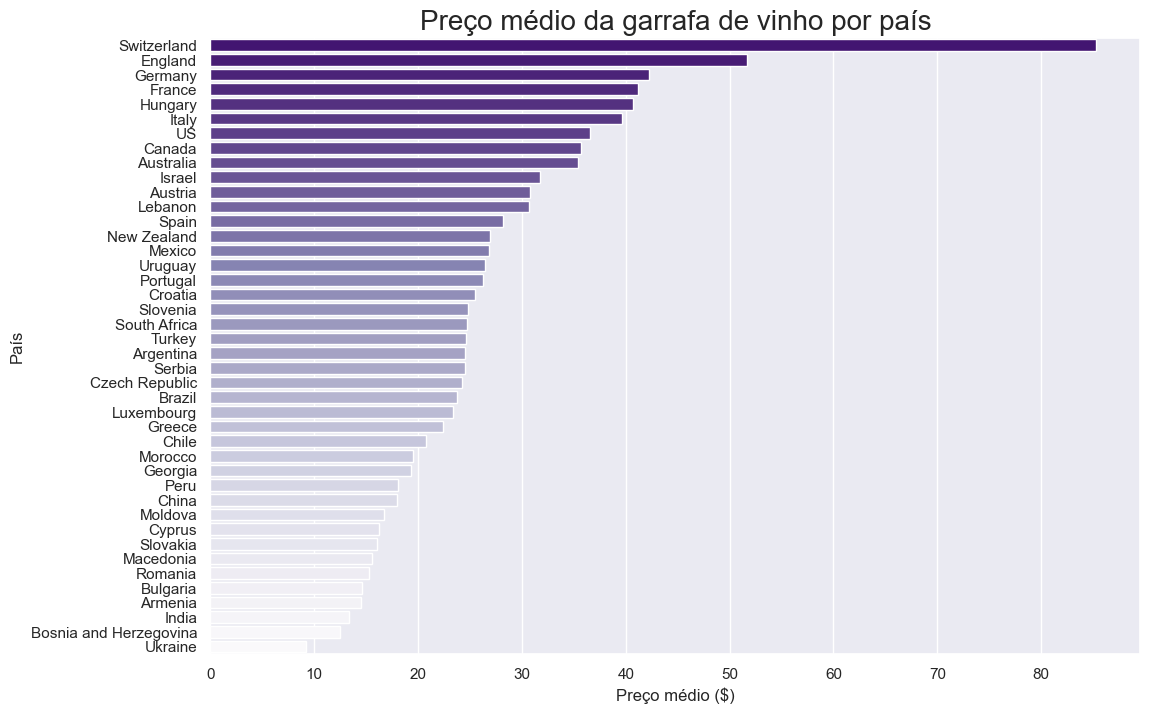

In [43]:
average_price = df1.groupby("country").agg("mean")
average_price = average_price.sort_values(by="price", ascending=False)
y = average_price.index.to_series()
x = average_price["price"]

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Preço médio da garrafa de vinho por país', fontsize = 20)
plt.xlabel('Preço médio ($)')
plt.ylabel('País');

### 12.Vinho mais barato

In [44]:
df1[df1["price"] == df1["price"].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


### 13.Vinho mais caro

In [45]:
df1[df1["price"] == df1["price"].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


### 14.Top 20 melhores vinhos!!!

In [46]:
df1["variety"].value_counts()[:20]

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Name: variety, dtype: int64

### 15.Top 10 Vinhos até 15 dólares

In [47]:
under_15 = df1.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
129572,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend
74042,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino
43193,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier
9609,France,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot
59823,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier


### 16. Top 10 Vinhos entre 15 e 30 dólares

In [49]:
between_15_30 = df1.drop(["description", "province", "winery"], axis=1)
between_15_30 = between_15_30.query("price > 15 and price <= 30")
between_15_30 = between_15_30.sort_values(by="points", ascending=False)[:10]
between_15_30.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache


### 17. Top 10 Vinhos entre 30 e 50 dólares

In [50]:
between_30_50 = df1.drop(["description", "province", "winery"], axis=1)
between_30_50 = between_30_50.query("price > 30 and price <= 50")
between_30_50 = between_30_50.sort_values(by="points", ascending=False)[:10]
between_30_50.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay
1560,US,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend
47432,US,97,50.000000,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay
4504,US,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel
114981,US,97,35.000000,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah
45986,France,97,45.000000,Château Coutet 2014 Barsac,Bordeaux-style White Blend
125831,US,97,50.000000,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay
16524,Portugal,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port),Port
128268,US,97,50.000000,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon
89730,France,97,50.000000,René Muré 2015 Clos Saint Landelin Vorbourg Grand Cru Riesling (Alsace),Riesling


### 18.Top 10 Vinhos com valor maior que 50 dólares

In [51]:
above_50 = df1.drop(["description", "province", "winery"], axis=1)
above_50 = above_50.query("price > 50")
above_50 = above_50.sort_values(by="points", ascending=False)[:10]
above_50.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah
111755,France,100,1500.000000,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
89729,France,100,617.000000,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese
111753,France,100,1500.000000,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red
